In [2]:
from new_model import *
from Graphing import *

c:\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [67]:
meta,X,X_rec,Yc,Yr,(meta_labels,X_labels,X_rec_labels,Yc_labels,Yr_labels) = load_ld("d1,2,4,8,20_all")

In [4]:
np.tile(np.array([[1,2,3],[4,5,6]]), (1, 5))

array([[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]])

In [74]:
X[:10, X_labels.index("patch__x0")]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
use_regions = ['ALL', 'NA1', 'EUW1', 'KR']
use_patches = ['9.12', '9.13', '9.14', '9.15', '9.16', '9.17', '9.18']
use_tiers = leag_tiers[1:]

In [77]:
meta_elo_i = meta_labels.index("elo")
meta_tiers = np.array([get_league_info(meta[i, meta_elo_i])[0] for i in range(len(X))])

<BarContainer object of 27 artists>

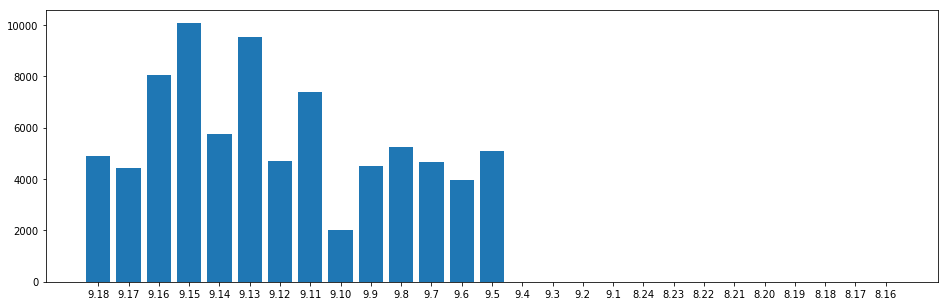

In [106]:
res = np.sum(X[:, [X_labels.index("patch__x" + str(i)) for i in range(len(patches_all))]], axis=0)
fig = plt.figure()
fig.set_size_inches(16, 5)
plt.bar(patches_all, res)

c:\python36\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


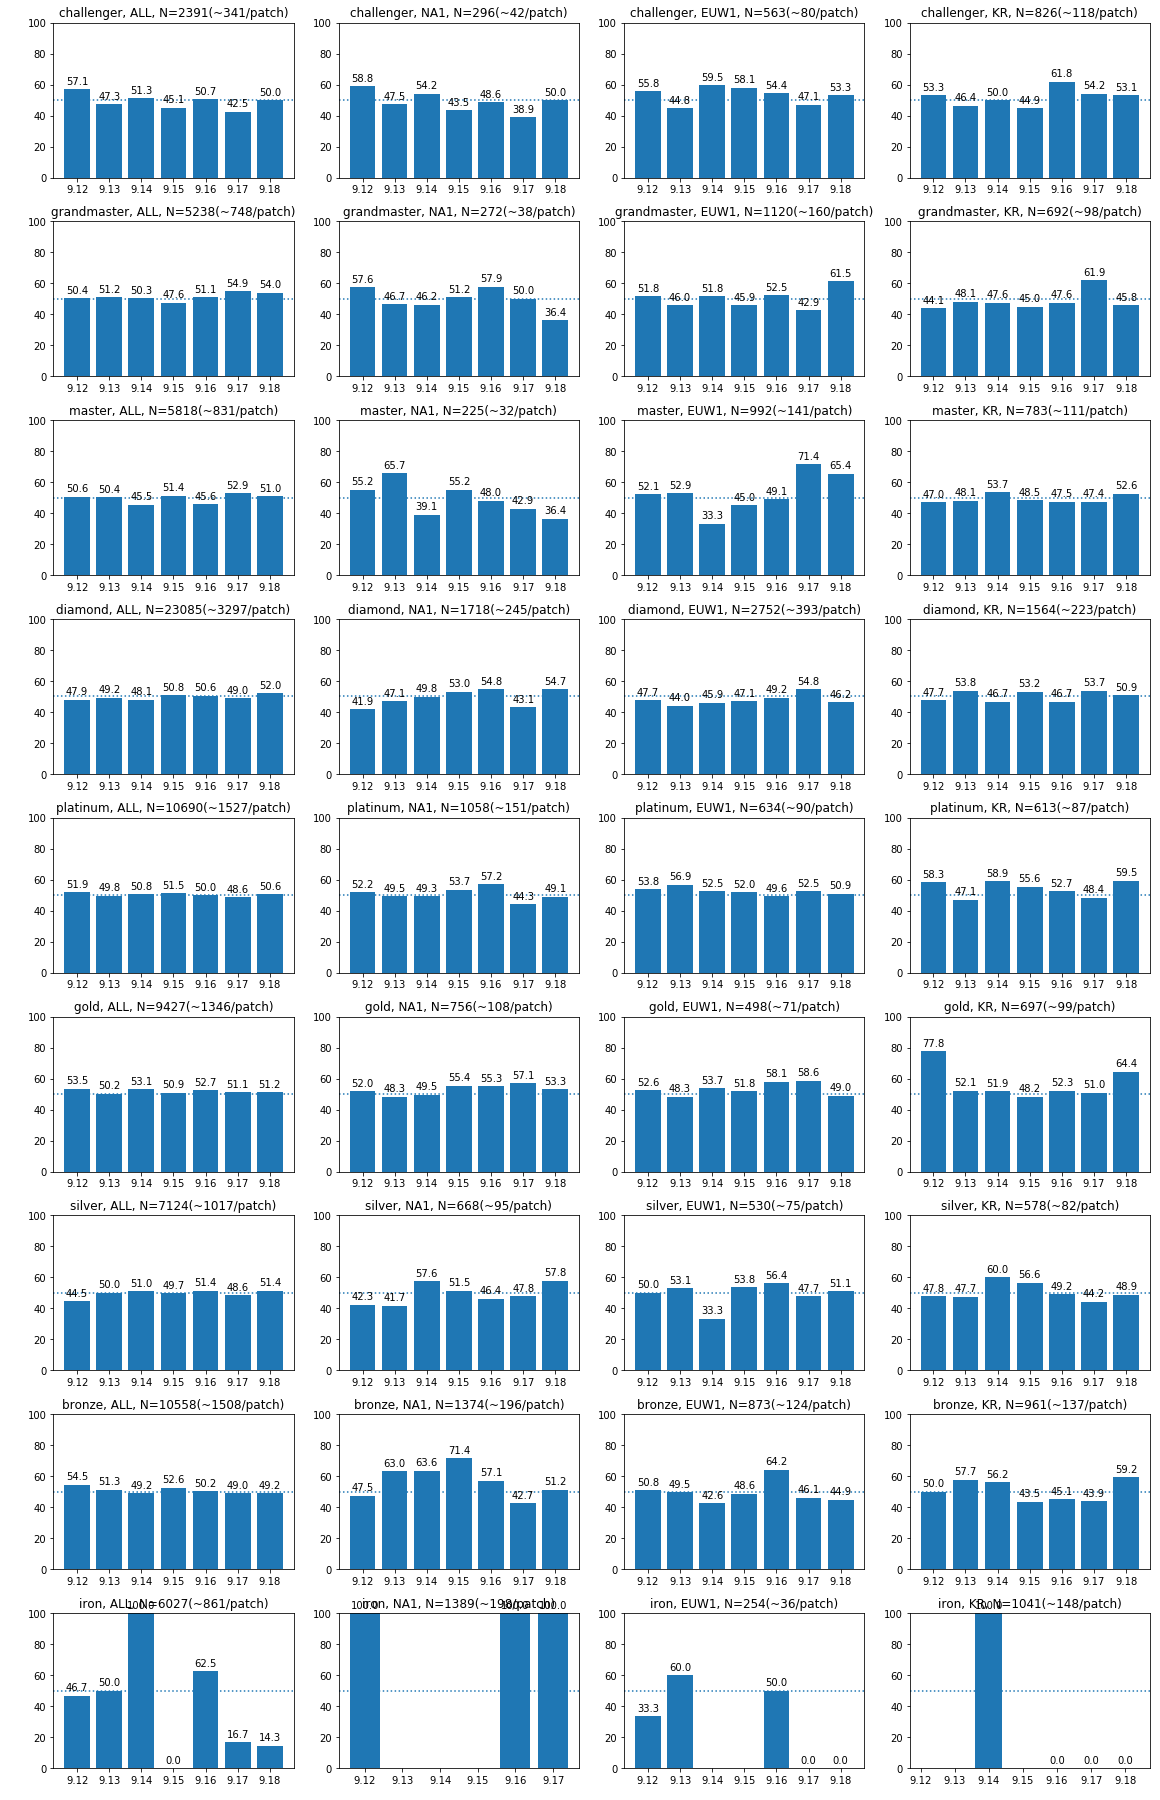

In [136]:
fig = plt.figure()
fig.set_size_inches(16, 25)

def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig_i = 0
for tier in use_tiers[::-1]:
    for reg in use_regions:
        fig_i += 1
        data = np.ones(meta.shape[0]).astype(bool)
        if reg != 'ALL':
            data = np.logical_and(data, meta[:, meta_labels.index("region_id")] == region_is[reg])
        data = np.logical_and(data, meta_tiers == leag_tier_is[tier])
        n_tot = sum(data)
        res = []
        n_samples_all = []
        for patch in use_patches:
            wins = Yc[:, Yc_labels.index("blue_win")][
                np.nonzero(np.logical_and(data, X[:, X_labels.index(
                    "patch__x" + str(patches_all.index(patch)))] == 1))[0]]
            n_samples = len(wins)
            res.append(100 * np.sum(wins)/n_samples)
            n_samples_all.append(n_samples)
        
        g = fig.add_subplot(len(leag_tiers) - 1, len(use_regions), fig_i)
        fig.tight_layout()
#         g.grid()
        g.axhline(y=50, ls=':')
        rects = g.bar(use_patches, res)
        autolabel(g, rects)
        g.set_ylim([0, 100])
        g.set_title(tier + ', ' + reg + ', N=' + str(n_tot) + '(~' + str(int(n_tot/len(use_patches))) + '/patch)')
#         g.xlabe

#         g.hist(train_accuracy, label='Blue')
#         g.plot(test_accuracy, label='Red')
#         g.legend(loc='lower right')

#         g = fig.add_subplot(1,2,2)
#         g.grid()
#         g.plot(train_loss, label='train loss')
#         g.plot(test_loss, label='test loss')
#         g.legend(loc='upper right')

# fig.suptitle("Blue team winrate across regions & skill brackets")
# plt.set_title()
plt.savefig("blue_side_advantage")
plt.show()

<Figure size 432x288 with 0 Axes>

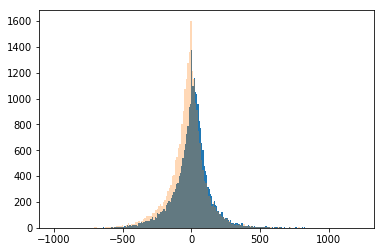

In [3]:
x = X[:, X_labels.index("blue_adc_elodeviation")]
y = Yc[:, Yc_labels.index("blue_win")]
x_i = [i for i in range(len(x)) if y[i] > 0.5]
plt.hist(x[x_i], bins=200)
x_i = [i for i in range(len(x)) if y[i] <= 0.5]
plt.hist(x[x_i], bins=200, alpha=0.3)
plt.show()

In [4]:
pr_fl("# samples:", X.shape[0])

meta, X, Yc, Yr, Y, X_labels, alpha, beta, X_scales, X_scalesdict, Yr_scales, Yr_scalesdict = \
preprocess_features(meta, X, Yc, Yr, meta_labels, X_labels, Yc_labels, Yr_labels)
X, X_labels = filter_features(X, X_labels)

n_tot = len(X)
n_test = 1999
n_pcal = 1
n_train = n_tot - (n_test + n_pcal)

 2019-09-17 17:35:04 # samples: 50194
 2019-09-17 17:35:04 Shuffling...
 2019-09-17 17:35:11 Scaling...
 2019-09-17 17:35:11 0.0 -1.0419853611433984e+16 814715.0 1.1984072545873852e+16
 2019-09-17 17:36:31 0.0 -0.5187139069909205 1.0 1.0
 2019-09-17 17:36:31 Adding beta winrates...


In [5]:
X_train, Y_train, X_pcal, Y_pcal = X[:n_train], Y[:n_train], X[n_train:n_train + n_pcal], Y[n_train:n_train + n_pcal]
X_test, Y_test = X[-n_test:], Y[-n_test:]
meta_train, meta_pcal, meta_test = meta[:n_train], meta[n_train:n_train + n_pcal], meta[-n_test:]

In [6]:
scaler = RobustScaler()
X_tr = scaler.fit_transform(X_train)
X_te = scaler.transform(X_test)

In [68]:
m = AdaBoostClassifier(n_estimators=50) #(98.56, 98.50)
# m = MLPClassifier(hidden_layer_sizes=(1024, 1024, 1024)) #(97.96447690583891, 93.74687343671836)
# m = LogisticRegression(C=0.94, solver='lbfgs', max_iter=3000, tol=1e-5)
# m = LinearSVC(C=0.5, dual=False)
# m = RandomForestClassifier()
n_minitrain = len(X_tr)
# n_minitrain = 50000
m.fit(X_tr[:n_minitrain], Y_train[:n_minitrain].flatten())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [69]:
preds_tr = m.predict(X_tr) # Train accuracy
preds = m.predict(X_te) # Test accuracy
np.mean(preds_tr == Y_train.flatten()) * 100, np.mean(preds == Y_test.flatten()) * 100

(98.73428227580196, 98.74937468734367)

In [70]:
np.all((m.decision_function(X_test) > 0) == (m.predict_proba(X_test)[:, 1] > 0.5))

True

In [ ]:
def test_model(dr_frac, k):
    dr = PCA(n_components=int(dr_frac * X_train.shape[1]))
    X_train_lowdim = dr.fit_transform(X_train)
    X_test_lowdim = dr.transform(X_test)
    m = LinearSVC()
    m.fit(X_train_lowdim[train_is], Y_train[train_is])

    test_is = np.random.choice(X_test.shape[0], n_minitest, replace=False)
    preds = m.predict(X_test_lowdim[test_is])
    return sum(preds == Y_test[test_is]) / n_minitest

In [ ]:
# Bounded region of parameter space
optimizer = BayesianOptimization(f=test_knn, pbounds={'dr_frac': (0.05, 1.0), 'k': (0.501, 50.499)})
optimizer.maximize(init_points=15, n_iter=100)